In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from glob import glob
import re
import neattext as nt
import neattext.functions as nfx
from textblob import TextBlob
import numpy as np

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           196256    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 212,907
Trainable params: 212,907
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
274/274 [==============================] - 34s 115ms/step - loss: 0.1326 - accuracy: 0.9639 - val_los

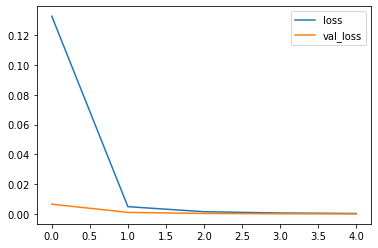

In [2]:
MODEL_FILE = "data/binary_crossentropy"

#Function for sentiment Analysis
#
# def analyze_sentiment(self, text):
#     analysis = TextBlob(self.clean(text))
            
#     if analysis.sentiment.polarity > 0: #Positive 
#         return 'Positive'
#     elif analysis.sentiment.polarity == 0: #Neutral
#             return 'Neutral'
#     else:
#         return 'Negative' #Negative
# #Loading in imdb dataset    
data = pd.read_csv("main corpus/pos_sentiment_included.csv")
pos_df = data
# pos_df ['sentiment'] =  np.array([dataAnalyzer.analyze_sentiment(text) for text in pos_df['0']])
# pos_df .to_csv(r'pos_sentiment_included.csv', index = False, header=True)
# pos_df


#Preparing the text for NLP
random_corpus = pos_df.sentiment
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(random_corpus)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(random_corpus)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

sentiment_label = pos_df.sentiment.factorize()

#Instantiating made model
model = keras.models.load_model(MODEL_FILE)
print(model.summary())
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.3, epochs=5, batch_size=32)
test_word = pos_df.values[20]
test_word = str(test_word)

tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=200)
prediction = int(model.predict(tw).round().item())
print("====================================")
print(sentiment_label[1][prediction])
print()
plt.plot(history.history['loss'], label  = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()